# Custom training: walkthrough

Based on this tutorial: [Custom training: walkthrough](https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough)

This notebook shows how to build a neural network model to classify  penguins species. 

## Setup

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

## Prerequisites

Make sure to install **TensorFlow Datasets** package which provides ready-to-use datasets. It handles downloading and preparing data and constructs [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) as a result.

Install:
```shell
poetry add tfds-nightly
```

# Meet the Penguins!

![Penguins!!!](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

More about the [palmerpenguins](https://allisonhorst.github.io/palmerpenguins/) dataset. 

## Import Dataset

The default [penguins/processed](https://www.tensorflow.org/datasets/catalog/penguins) TensorFlow Dataset is already cleaned, normalized, and ready for building a model. Before you download the processed data, preview a simplified version to get familiar with the original penguin survey data.

## Preview the Data

Since the `penguins/processed` dataset is prepared, cleaned and so on, it makes sense to take a look at simplified version to get familiarized outselves with the data.

In [12]:
data_preview, info = tfds.load('penguins/simple', split='train', with_info=True)
df = tfds.as_dataframe(data_preview, info)

In [13]:
df[:5]

body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm  island  \
0       4200.0             13.9         45.500000              210.0       0   
1       4650.0             13.7         40.900002              214.0       0   
2       5300.0             14.2         51.299999              218.0       0   
3       5650.0             15.0         47.799999              215.0       0   
4       5050.0             15.8         46.299999              215.0       0   

   sex  species  
0    0        2  
1    0        2  
2    1        2  
3    1        2  
4    1        2

In [14]:
df.describe()

body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm  \
count   342.000000       342.000000        342.000000         342.000000   
mean   4201.754395        17.151171         43.921932         200.915207   
std     801.954529         1.974793          5.459584          14.061714   
min    2700.000000        13.100000         32.099998         172.000000   
25%    3550.000000        15.600000         39.224998         190.000000   
50%    4050.000000        17.299999         44.450001         197.000000   
75%    4750.000000        18.700001         48.500000         213.000000   
max    6300.000000        21.500000         59.599998         231.000000   

           island         sex     species  
count  344.000000  344.000000  344.000000  
mean     0.662791    0.552326    0.918605  
std      0.726194    0.558680    0.893320  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      1.000000    1.000000    1.000000  
75%      1.000000    1.000000    2.000000  
max      2.000000    2.000000    2.000000

array([[<AxesSubplot: title={'center': 'body_mass_g'}>,
        <AxesSubplot: title={'center': 'culmen_depth_mm'}>,
        <AxesSubplot: title={'center': 'culmen_length_mm'}>],
       [<AxesSubplot: title={'center': 'flipper_length_mm'}>,
        <AxesSubplot: title={'center': 'island'}>,
        <AxesSubplot: title={'center': 'sex'}>],
       [<AxesSubplot: title={'center': 'species'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

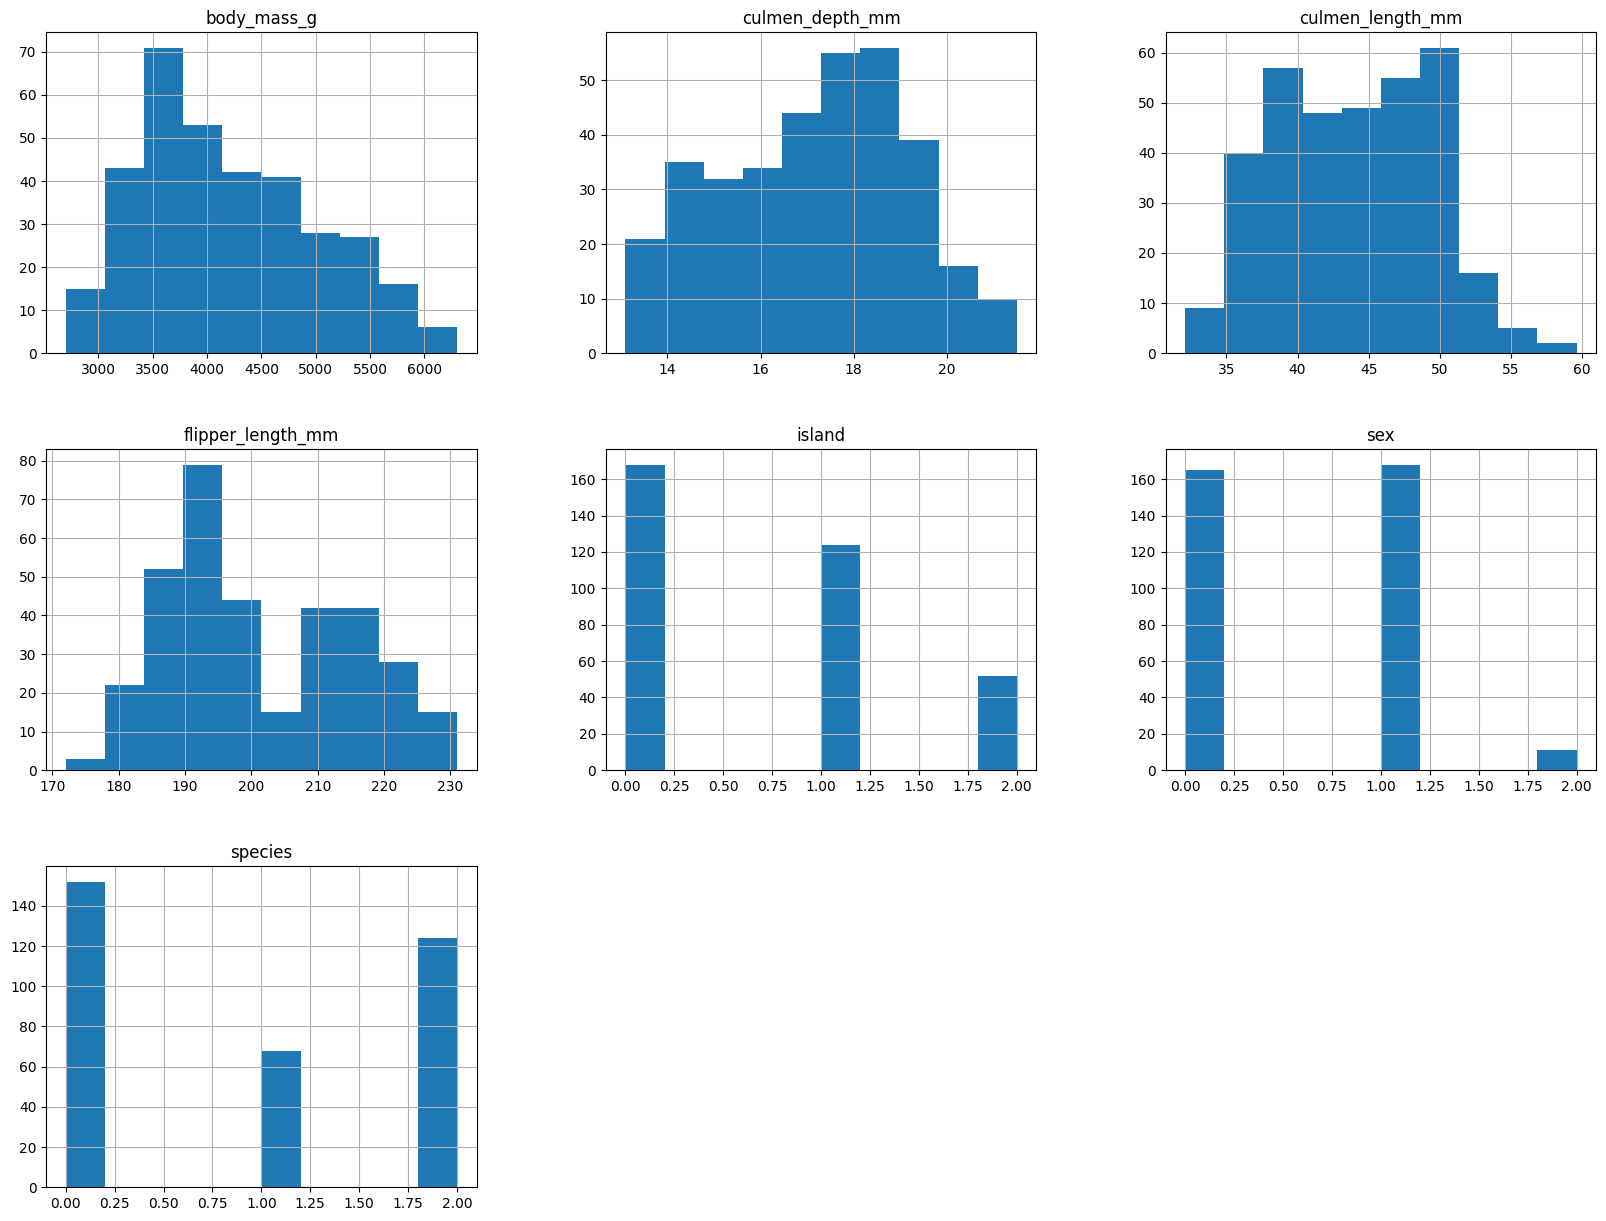

In [19]:
df.hist(figsize=(20,15))

In [26]:
df.plot(kind="scatter", x="body_mass_g", y="culmen_length_mm", c="species", cmap="jet")

<AxesSubplot: xlabel='body_mass_g', ylabel='culmen_length_mm'>

<AxesSubplot: xlabel='body_mass_g', ylabel='flipper_length_mm'>

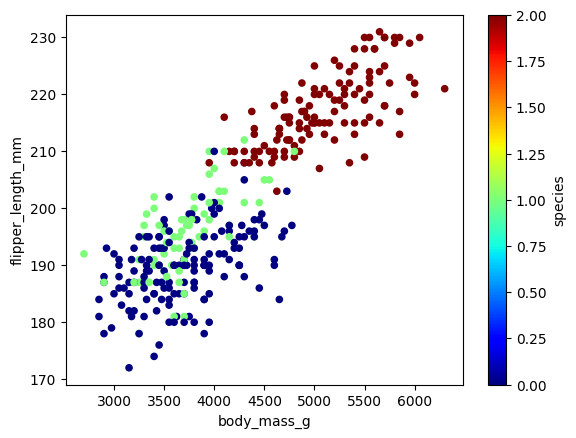

In [27]:
df.plot(kind="scatter", x="body_mass_g", y="flipper_length_mm", c="species", cmap="jet")

### Dimensionality Reduction

#### Clean Data

In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


numeric = df.dropna()[["body_mass_g", "culmen_depth_mm", "culmen_length_mm", "flipper_length_mm"]]
numeric.describe()

body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm
count   342.000000       342.000000        342.000000         342.000000
mean   4201.754395        17.151171         43.921932         200.915207
std     801.954529         1.974793          5.459584          14.061714
min    2700.000000        13.100000         32.099998         172.000000
25%    3550.000000        15.600000         39.225000         190.000000
50%    4050.000000        17.299999         44.450001         197.000000
75%    4750.000000        18.700001         48.500000         213.000000
max    6300.000000        21.500000         59.599998         231.000000

In [44]:
scaled = StandardScaler().fit_transform(numeric)
pd.DataFrame(scaled).describe()

0             1             2             3
count  3.420000e+02  3.420000e+02  3.420000e+02  3.420000e+02
mean   2.788521e-09  2.230817e-08 -2.788521e-09 -1.394261e-08
std    1.001465e+00  1.001465e+00  1.001465e+00  1.001465e+00
min   -1.875362e+00 -2.054446e+00 -2.168527e+00 -2.059320e+00
25%   -8.138982e-01 -7.866353e-01 -8.615696e-01 -7.773731e-01
50%   -1.895079e-01  7.547510e-02  9.686540e-02 -2.788381e-01
75%    6.846384e-01  7.854496e-01  8.397669e-01  8.606704e-01
max    2.620248e+00  2.205397e+00  2.875868e+00  2.142618e+00

**NOTE**: Now all the data has a `mean ~= 0.0` and `std ~= 1.0`

### UMAP

In [45]:
import umap


reducer = umap.UMAP()
embeddings = reducer.fit_transform(scaled)

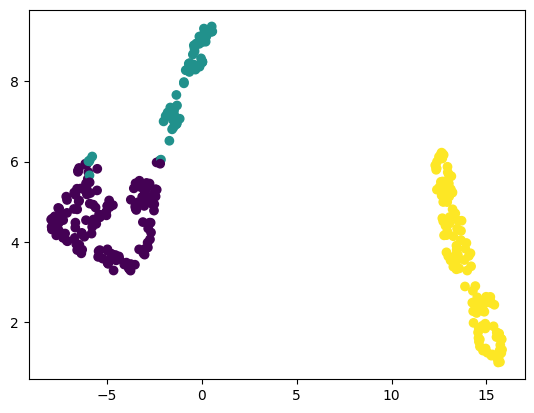

In [46]:
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=df.dropna()["species"])

### PaCMAP

In [47]:
import pacmap

reducer = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0)
embeddings = reducer.fit_transform(scaled)

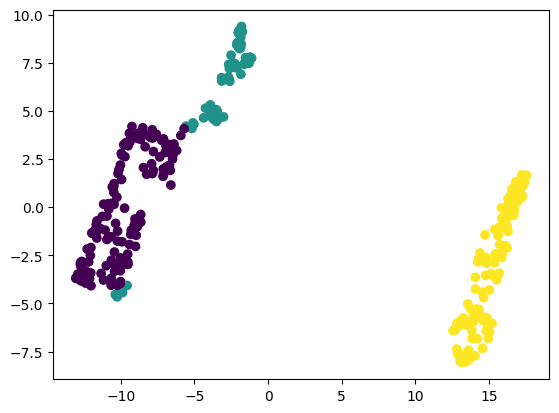

In [48]:
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=df.dropna()["species"])

### TriMAP

In [49]:
import trimap

reducer = trimap.TRIMAP()
embeddings = reducer.fit_transform(scaled)

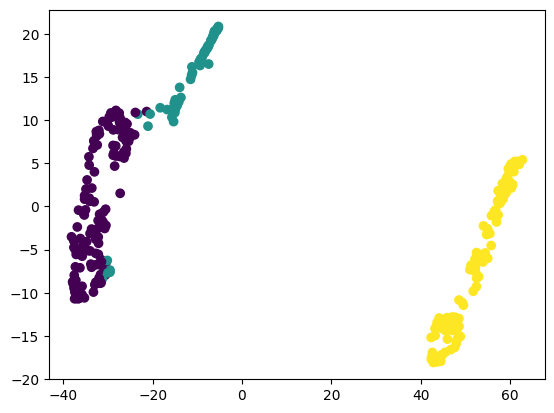

In [50]:
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=df.dropna()["species"])

### t-SNE

In [51]:
from sklearn.manifold import TSNE

reducer = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
embeddings = reducer.fit_transform(scaled)

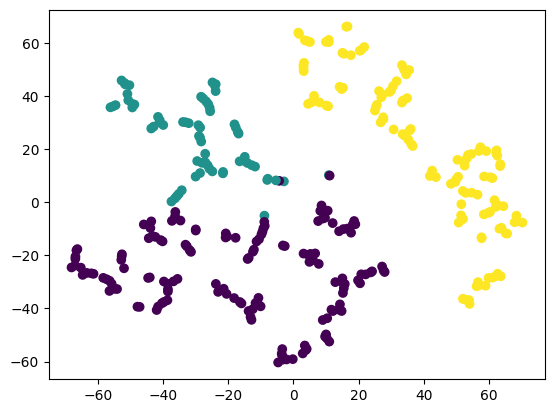

In [52]:
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=df.dropna()["species"])

## Get Real Data

In [54]:
data_split, info = tfds.load("penguins/processed", split=['train[:20%]', 'train[20%:]'], as_supervised=True, with_info=True)

In [72]:
data_test, data_train = data_split[0], data_split[1]
train_batch = data_train.batch(32)

#### Let's Preview Batch from Clean Dataset

In [77]:
features, labels = list(train_batch)[0]
plt.scatter(features[:, 0], features[:, 2], c=labels, cmap='viridis')

# Define Model

![Network](https://www.tensorflow.org/tutorials/customization/images/full_network_penguin.png)

We simply create a linear stack of layers, with [relu](https://www.tensorflow.org/api_docs/python/tf/nn/relu) activation function. 

In [124]:
def make_model():
    return tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
        tf.keras.layers.Dense(10, activation=tf.nn.relu),
        tf.keras.layers.Dense(3, activation=tf.keras.activations.softmax),
    ])

model = make_model()

In [98]:
predictions = model(features)
predictions

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[0.27338016, 0.32417017, 0.40244967],
       [0.32900116, 0.26934314, 0.40165573],
       [0.2560926 , 0.3083823 , 0.4355251 ],
       [0.2790018 , 0.33810908, 0.38288912],
       [0.265139  , 0.3675764 , 0.3672846 ],
       [0.2864388 , 0.2822646 , 0.43129662],
       [0.265029  , 0.29696664, 0.4380043 ],
       [0.27389452, 0.32131237, 0.40479308],
       [0.26145878, 0.34832335, 0.3902179 ],
       [0.29977104, 0.32072946, 0.37949947],
       [0.2808088 , 0.31379563, 0.40539557],
       [0.28919604, 0.34595013, 0.36485386],
       [0.2958402 , 0.32821873, 0.3759411 ],
       [0.2767545 , 0.35964012, 0.36360535],
       [0.28489515, 0.350732  , 0.36437282],
       [0.29975757, 0.2752042 , 0.42503828],
       [0.319568  , 0.27810064, 0.40233135],
       [0.31145635, 0.2683614 , 0.42018223],
       [0.2859121 , 0.33734268, 0.3767452 ],
       [0.27501756, 0.3565089 , 0.3684735 ],
       [0.27488953, 0.3628201 , 0.36229035],
      

In [108]:
list(zip(tf.math.argmax(predictions, axis=1).numpy(), labels.numpy()))

[(2, 0),
 (2, 2),
 (2, 1),
 (2, 0),
 (1, 0),
 (2, 1),
 (2, 1),
 (2, 1),
 (2, 0),
 (2, 1),
 (2, 1),
 (2, 0),
 (2, 0),
 (2, 0),
 (2, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 0),
 (2, 0),
 (1, 0),
 (1, 0),
 (2, 2),
 (2, 2),
 (2, 1),
 (2, 2),
 (2, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 0)]

# Train the Model

## Loss Function 

We use [Cross-Entropy](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy) as a loss function. 

In [137]:
prob = tf.linspace(0.0001, 1.0, num=200)
cross_entropy = - tf.math.log(prob)
plt.plot(prob, cross_entropy, label="Cross-Entropy")
plt.xlabel("Predicted probability")
plt.ylabel("Loss")
plt.legend()
plt.show()

The Cross-Entropy computes a smooth loss value depending on the predicted probability and the actual class. The value is calculated as a negative log of the probability of the correct answer. 

$$ loss = - \sum^{M}_{c=1}y_{c}log(p_{c}) $$

Where $ y_c = 1$ if the correct class is `c` and $ y_c = 0 $ otherwise. So obviously $ loss \rightarrow \infty $ when probability of the correct class $ p_c \rightarrow 0 $. And $loss$ remains unchanged for all other classes. 

So this function is 
1. Differentiable, so we can calculated a gradient of the loss with respect to the trainable variables
2. The loss is very-very high when correct answer is predicted as unlikely

In [111]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [116]:
loss(y_true=labels, y_pred=model(features))

<tf.Tensor: shape=(), dtype=float32, numpy=1.1200066>

## Optimizer

Optimizer is a an algorithm for minimizing the loss function computed on the training set. Usually optimizers calculate a gradient of the loss with respect to the trainable variables using the [tf.GradientTape](https://www.tensorflow.org/api_docs/python/tf/GradientTape) (API for auto-differentiation of the computed value) and then performs a *step* - meaning a change in the current value of the trainable variables.

![Optimizers](https://cs231n.github.io/assets/nn3/opt1.gif)

In this case we will use a [Stochastic gradient descen](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (aka. SGD). The idea of the SGD is to use a random subset of the training set to compute the gradient on each step (which makes optimization less computationally instensive). 

In [118]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

## Training Loop

In [122]:
from dataclasses import dataclass, field
from typing import Sequence

def calc_gradient(model, inputs, expected_output, loss):
    with tf.GradientTape() as tape:
        loss_value = loss(
            y_true=expected_output,
            y_pred=model(inputs),
        )
    gradient = tape.gradient(loss_value, model.trainable_variables)
    return loss_value, gradient


@dataclass
class LearningHistory:
    loss: Sequence[float] = field(default_factory=list)
    accuracy: Sequence[float] = field(default_factory=list)

def train(model, train_batches, loss, optimizer, epochs=200) -> LearningHistory:
    history = LearningHistory()
    for epoch in range(epochs):
        epoch_loss_avg = tf.keras.metrics.Mean()
        epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
        for inputs, outputs in train_batches:
            l, gradients = calc_gradient(model, inputs, outputs, loss)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            
            epoch_loss_avg.update_state(l)
            epoch_accuracy.update_state(outputs, model(inputs, training=True))
        history.loss.append(epoch_loss_avg.result())
        history.accuracy.append(epoch_accuracy.result())
    return history

In [153]:
model = make_model()
epochs = 200
history = train(
    model=model,
    train_batches=train_batch,
    loss=loss, 
    optimizer=optimizer,
    epochs=epochs,
)

In [154]:
plt.plot(range(epochs), history.loss, label="Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

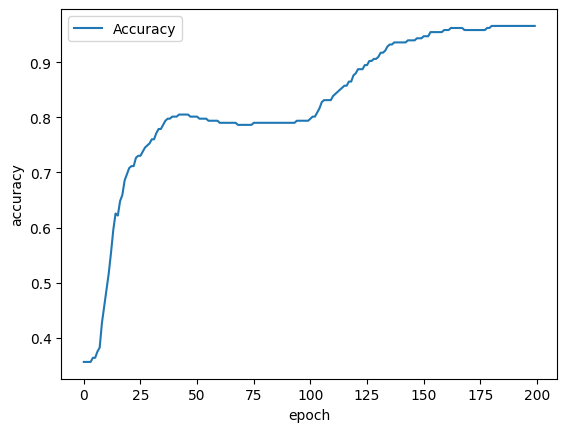

In [155]:
plt.plot(range(epochs), history.accuracy, label="Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Discussion

It is interesting to discuss the `Accuracy` curve. We can see that the value is very low, then sky-rocket to the ~0.8 and the remains flat. It has a plateau at some number of initial epochs and some number of ending epochs. 

What does it mean?

When we just started learning, almost all our predictions are incorrect. We rarely get correct answers just by chance. So the overall accuracy is not changing. **But how do we progress in this case? How do we decide in which direction to change our model in order to perform better? Whatever we do, we get a poor accuracy.**

When we answer correctly in most cases the accuracy jumps to the value of about `0.8`. In this case the correct answers already dominates (in a probability) the wrong answers. **But how do we progress further in this curcumstances? How do we become more confident in our correct answers, if accuracy is not sensitive to small changes anymore?**

The answer is **Cross-Entropy** loss-function! That's why we dont use negative accuracy as a loss function! As we can see from the loss function plot we gradually progressed all the time during the training. That's thanks to the smooth nature of the *Cross-Entropy* which is defined for all possible probabilities of the correct answer. **It remains sensitive to improvements even when most our answers are wrong or correct!** Because it take into account our confidence in the correct answer and it is very sensitive to even small improvements when we perform poorly ($ -log(p_c) \rightarrow \infty $ in this case.)

Hurray! I got it!
![Hurray!](https://kellsmurthwaite.files.wordpress.com/2007/12/hurray_1.jpg)

# Evaluate Results

In [156]:
accuracy = tf.keras.metrics.Accuracy()
test_batch = data_test.batch(32)

for inputs, outputs in test_batch:
    prediction = tf.math.argmax(model(inputs), axis=1, output_type=tf.int64)
    accuracy(prediction, outputs)

accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9701493>

In [157]:
predict_dataset = tf.convert_to_tensor([
    [0.3, 0.8, 0.4, 0.5,],
    [0.4, 0.1, 0.8, 0.5,],
    [0.7, 0.9, 0.8, 0.4]
])

predictions = model(predict_dataset)
class_names = ['Adélie', 'Chinstrap', 'Gentoo']
for i, confidence in enumerate(predictions):
    print(f"Example {i}:")
    for cls, name in enumerate(class_names):
        print(f"\t{name}: {confidence[cls]:0.2f}")
    print("---\n")

Example 0:
	Adélie: 0.77
	Chinstrap: 0.19
	Gentoo: 0.04
---

Example 1:
	Adélie: 0.01
	Chinstrap: 0.02
	Gentoo: 0.97
---

Example 2:
	Adélie: 0.11
	Chinstrap: 0.77
	Gentoo: 0.12
---

